<h1>Quora Question Pairs<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-word-embeddings/word-vectors." data-toc-modified-id="Load-the-word-embeddings/word-vectors.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the word embeddings/word vectors.</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Size-of-the-dataset" data-toc-modified-id="Size-of-the-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Size of the dataset</a></span></li><li><span><a href="#Removing-rows-with-NaNs" data-toc-modified-id="Removing-rows-with-NaNs-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Removing rows with NaNs</a></span></li><li><span><a href="#Sampling-a-fraction-of-the-data-without-replacement-for-efficiency-reasons" data-toc-modified-id="Sampling-a-fraction-of-the-data-without-replacement-for-efficiency-reasons-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sampling a fraction of the data without replacement for efficiency reasons</a></span></li><li><span><a href="#Renaming-the-column-names-and-removing-unwanted-data-from-the-dataframe" data-toc-modified-id="Renaming-the-column-names-and-removing-unwanted-data-from-the-dataframe-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Renaming the column names and removing unwanted data from the dataframe</a></span></li><li><span><a href="#Finding-the-optimal-sentence-length" data-toc-modified-id="Finding-the-optimal-sentence-length-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Finding the optimal sentence length</a></span></li></ul></li><li><span><a href="#Cleaning-text" data-toc-modified-id="Cleaning-text-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cleaning text</a></span></li><li><span><a href="#Finding-the-most-frequent-words-not-in-our-vocabulary" data-toc-modified-id="Finding-the-most-frequent-words-not-in-our-vocabulary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Finding the most frequent words not in our vocabulary</a></span></li><li><span><a href="#Tokenize-text-and-create-embedding-dictionary" data-toc-modified-id="Tokenize-text-and-create-embedding-dictionary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tokenize text and create embedding dictionary</a></span></li><li><span><a href="#Utility-functions" data-toc-modified-id="Utility-functions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Utility functions</a></span></li><li><span><a href="#Approach-1:-Average-word-vectors" data-toc-modified-id="Approach-1:-Average-word-vectors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Approach 1: Average word vectors</a></span><ul class="toc-item"><li><span><a href="#Creating-features-by-averaging-word-embeddings" data-toc-modified-id="Creating-features-by-averaging-word-embeddings-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Creating features by averaging word embeddings</a></span></li><li><span><a href="#Splitting-the-data-into-train,-test-and-validation-datasets." data-toc-modified-id="Splitting-the-data-into-train,-test-and-validation-datasets.-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Splitting the data into train, test and validation datasets.<br></a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Gaussian-NaiveBayes" data-toc-modified-id="Gaussian-NaiveBayes-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Gaussian NaiveBayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Feed-forward-Neural-network" data-toc-modified-id="Feed-forward-Neural-network-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Feed forward Neural network</a></span></li></ul></li><li><span><a href="#Approach-2:-RNN-Models" data-toc-modified-id="Approach-2:-RNN-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Approach 2: RNN Models</a></span><ul class="toc-item"><li><span><a href="#Splitting-and-zero-padding." data-toc-modified-id="Splitting-and-zero-padding.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Splitting and zero padding.</a></span></li><li><span><a href="#LSTM-Classifier" data-toc-modified-id="LSTM-Classifier-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>LSTM Classifier</a></span></li><li><span><a href="#Attention-Model" data-toc-modified-id="Attention-Model-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Attention Model</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>References:<br></a></span></li></ul></div>

## Introduction

The problem is about identifying question pairs with the same intent. The dataset was released by Quora on Kaggle as a standard data science competition.Please note that it is not about identifying related questions. Two questions may be similar or related but might not have the same intent. So we are not finding sentences that are syntactically or semantically similar. The questions in the dataset are actual quora questions and there are punctuation,grammatical errors and nouns that might not be found in the standard English Dictionary.<br>
In this notebook, we mainly explore two approaches of solving the problem.In the first approach, we take the average of embeddings of all words ina sentence and use them as features to build classification models. In the second approach, we build a LSTM and Attention sequence model. Finally, we plot ROC curves to comapare these models.<br>
Link to the original Kaggle competition: https://www.kaggle.com/c/quora-question-pairs<br><br>

 ## Imports

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import pickle
import time
import datetime
from collections import defaultdict, Counter
from string import punctuation
import numpy.random as rn

import matplotlib.pyplot as plt
%matplotlib inline

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from hypopt import GridSearch

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier

import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model,Sequential,model_from_json
from keras.layers import Input, Embedding, LSTM, GRU, Bidirectional, Conv1D, Dense, Activation
from keras.layers import Dropout, BatchNormalization, Flatten, Reshape, Lambda, dot, add
from keras.regularizers import l2
from keras.optimizers import Adadelta,SGD
from keras.activations import selu
from keras.callbacks import Callback,ModelCheckpoint
from keras.constraints import maxnorm

np.random.seed(1234)

c:\users\poovanna\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


## Load the word embeddings/word vectors.

word_embeddings is a dictionary with words as keys and the values are the numerical word embeddings for the word as a list.<br>
For example, "house" : [ 0.45, -0.56, 0.23, ..... , 0.67 ]<br>In this notebook, we use the pretrained word2vec word embeddings from Google - https://code.google.com/archive/p/word2vec/<br>This will be our vocabulary<br>word2vec was one of the earliest and now there are better representations like Fasttext and BERT.<br>

In [2]:
## This file contains a python dictionary of 300 dimensional word vectors
WORD_EMBEDDING_FILE="word_2_vec.pkl"
EMBEDDING_LEN=300

## Load word embeddings from file
with open(WORD_EMBEDDING_FILE, 'rb') as input:
    word_embeddings = pickle.load(input)

## Load the data

In [3]:
df = pd.read_csv('Dataset/train.csv')

### Size of the dataset

In [4]:
print("Size of the dataset: ", df.shape)
print("Columns: ",df.columns)

Size of the dataset:  (404290, 6)
Columns:  Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')


### Removing rows with NaNs

In [5]:
df[df.isnull().T.any().T]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [6]:
df=df.dropna()

### Sampling a fraction of the data without replacement for efficiency reasons

In [7]:
df=df.sample(frac=0.3,replace=False)
#df[df['is_duplicate']==0].head(50)

### Renaming the column names and removing unwanted data from the dataframe

In [8]:
df=df.rename(columns={"question1": "q1", "question2": "q2"})
questions_cols = ['q1', 'q2']
pred_column='is_duplicate'
df=df[questions_cols+[pred_column]]

### Finding the optimal sentence length

In [9]:
'''
q1=questions_cols[0]
q2=questions_cols[1]
plt.hist(df[q1].apply(lambda x:len(x))+df[q2].apply(lambda x:len(x)),normed=0,bins=61,alpha=0.70)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Histogram of sentence lengths')
#plt.axis([0, 30, 0, 800])
#plt.grid(True)
plt.show()
#(x, bins=n_bins, density=True)
'''

"\nq1=questions_cols[0]\nq2=questions_cols[1]\nplt.hist(df[q1].apply(lambda x:len(x))+df[q2].apply(lambda x:len(x)),normed=0,bins=61,alpha=0.70)\nplt.xlabel('Sentence Length')\nplt.ylabel('Count')\nplt.title('Histogram of sentence lengths')\n#plt.axis([0, 30, 0, 800])\n#plt.grid(True)\nplt.show()\n#(x, bins=n_bins, density=True)\n"

## Cleaning text

In [10]:
stop_words = set(stopwords.words('english'))
tag_map = defaultdict(lambda : "n")
tag_map['J'],tag_map['V'],tag_map['R'] = "a","v","r"
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

replacements=[
              ## Expanding contractions
              (r"\b([A-Za-z]+)'s\b", '\\1 is'), (r"\b([A-Za-z]+)'re\b", '\\1 are'),
              (r"\b([A-Za-z]+)'ve\b", '\\1 have'), (r"\b([A-Za-z]+)'ll\b", '\\1 will'),
              (r"\b([A-Za-z]+)n't\b", '\\1 not'),
              (" whats "," what is "),(" whos ","who is "),("wheres ","where is"),
              (" whens "," when is "),(" hows "," how is "),(" im "," i am "),
              (" hes "," he is "),(" shes "," she is "),("thats ","that is "),
              ("theres ","there is "),(" isnt "," is not "),("wasnt","was not"),
              (" arent"," are not"),("werent","were not"),(" cant "," can not "),
              ("cannot","can not"),("couldnt","could not"),(" dont"," do not"),
              ("didnt","did not"),("shouldnt","should not"),("wouldnt","would not"),
              ("doesnt","does not"),("havent","have not"),("hasnt","has not"),
              ("hadnt","had not"),
              ('\s+',' '), # replace multi space with one single space
              
              ### Spelling mistakes
              ("colour","color"),(" centre "," center "),(" grey "," gray "), (" favourite "," favorite "),
              (" travelling "," traveling "),("programing", "programming"),("calender", "calendar"),
              ("intially", "initially"), ("quikly", "quickly"),("imrovement", "improvement"),
              ("demonitization", "demonetization"),("demonetisation", "demonetization"),("demonetize","demonetization"),
              ("canceled",'canceled'),(" defence "," defense "),("programme","program"),
              ("actived", "active"), (" tution", " tuition"),("banglore", "bangalore"),('behaviour','behavior'),
              ("bengaluru", "bangalore"),('organisation','organization'),('realise','realize'),
              ('accomodation','accommodation'),('adress','address'),('alot','a lot'),('athiest','atheist'),
              ('beleive','believe'),('enviroment','environment'),('freind','friend'),('goverment','government'),
              ('grammer','grammar'),('hight','height'),('independance','independence'),('intresting','interesting'),
              ('lazer','laser'),('lightening','lightning'),('ninty','ninety'),('noone','no one'),('oppurtunity','opportunity'),
              ('recieve','receive'),('reccomend','recommend'),('seperate','separate'),('thier','their'),
              ('vegeterian','vegetarian'),('writen','written'),('writting','writing'),('truely','truly'),
              ('commitee','committee'),('independant','independent'),('foriegn','foreign'),('happend','happened'),
              ('publically','publicly'),('realy',"really"),('tatoo','tattoo'),('prefered','preferred'),('technologyss','technology'),
              ('technologys','technology'),('programr','programmer'),('healtheir','healthier'),('aadhaar','aadhar'),
              
              ## Expanding abbreviations
              ('aadhar','indian identity card'),
              ("upsc","union public service commission"),(" ugc "," university grants commission "),
              (" sbi "," state bank of india "),(" iit"," indian institute of technology"),
              (" iims "," indian institute of management "),("mca","master of computer application"),
              ("mds","master of dental surgery"),("nba","national basketball association"),
              (" iim"," indian institute of management "),("mbbs"," bachelor of medicine bachelor of surgery "),
              ("bitcoin"," bit coin "),(" iisc "," indian institute of science "),
              ('isro',"indian space research organization"),
              ('toefl'," test of english as a foreign language"),("mtech","master of engineering"),
              ("aiims"," all india institutes of medical sciences"),("gmat","graduate management admission test"),
              (" gre "," graduate record examinations "),("mnc","multinational corporation"),
              ('tcs','tata consultancy service'),('kvpy','indian scholarship'),
              ('ibps','institute of banking personnel selection'),
              ('irctc','indian railway catering and tourism corporation'),
              ('ielts','international english language testing system'),
              ("brexit","british exit"),(" bba "," bachelor of business administration "),
              (" mba "," master of business administration "),(" obc"," other backward caste"),
              (" cs ", " computer science "),(" cse ", " computer science "),
              (' ece ',' electronics and communication engineering '), (" btech"," bachelor of technology"),
              (" nra "," national rifle association "),
              ("kms", " kilometers "),
              (" uk ", " england "),(" u s ", " usa "),
              ("the us ", "usa"),(" americaa "," america "),
              ("e-mail", "email"),(" e mail", "email"),(" 9 11 ", "911"),(" b g ", " bg "),
              ('₹',' rupee '), (' txt '," text "), ("cgpa","grade point average"), (" J K ", " JK "),             
              
              
              (" imessage "," message application "),(' wechat '," chat application"),
              (" ios", " operating system"),(" iPhone ", " phone "),(" iphone ", " phone "),
              (" i phone ", " phone "),("watsapp","whatsapp"),(" OS "," operating system "),("Wi-Fi", "wifi"),
              
              (" bestfriend", " best friend"),(" bf "," boy friend "),(" gf "," girl friend "),
              (" boyfriend"," boy friend "),(" girlfriend"," girl friend"),
              
              ("upvote", "up vote"),(" downvotes ", " up votes "),
    
              ## Years
              (" 1990"," year nineteen ninety "),(" 1991"," year nineteen ninety one "),(" 1992"," year nineteen ninety two"),
              (" 2001"," year two thousand one"),(" 2002"," year two thousand two"),(" 2003"," year two thousand three"),
              (" 2010"," year two thousand ten"),(" 2011"," year two thousand eleven"),(" 2012"," year two thousand twelve"),
              (" 2013"," year two thousand thirteen"),(" 2014 "," year two thousand fourteen"),
              (" 2015"," year two thousand fifteen"),(" 2016"," year two thousand sixteen"),(" 2017"," year two thousand seventeen"),
              (" 2018"," year two thousand eighteen"),(" 2019"," year two thousand nineteen"),(" 2020"," year two thousand twenty"),
              (" 2021"," year two thousand twenty one"),
    
              ## Meaning of most commonly occuring non-vocabulary terms
              ('quorans','quora users'),('quora','question and answer website'),
              ('instagram','photo and video sharing social network'),
              ('whatsapp','messenger'),('snapchat','multimedia messaging app'),
              ('paytm','indian ecommerce payment system'),('redmi','phone company'),('flipkart','indian electronic commerce company'),
              ('jio','indian mobile network operator'),('spotify','music streaming platform'),('snapdeal','indian ecommerce company'),
              ('accenture','global management consulting and professional services firm'),
              ('narendra','indian prime minister'),('goswami','indian television anchor'),('arnab','indian television anchor'),
              ('airbnb','online marketplace and hospitality service'),
              ('kejriwal','delhi chief minister'),('arvind','delhi chief minister'),('cambodia','southeast asian nation'),
              ('h1b','american work visa'),('xiaomi','chinese electronics company'),(" cheque "," bank draft"),
              ('zuckerberg','facebook founder'),
    
              ## Numbers
              (" II ", " two "),(" III ", " three "),(" V ", " five "),
              (" 1st"," first"),(" 2nd"," second"),(" 3rd"," third"),(" 4th"," fourth"),(" 5th"," fifth"),
              (" 6th"," sixth"),(" 7th"," seventh"),(" 8th"," eigth"),(" 9th"," ninth"),(" 10th"," tenth"),
              ("11th"," eleventh"),(" 12th"," twelfth"),
              (" 00000"," 0"),(" 0000"," 0"),(" 000"," 0 "),(" 00"," 0"),(" 0 "," zero "),
              (" 1 "," one "),(" 01 "," one "),(" 2 "," two "),(" 3 "," three "),(" 4 "," four "),(" 5 "," five "),
              (" 6 "," six "),(" 7 "," seven "),(" 8 ", " eight "),(" 9 "," nine "),(" 10 "," ten "),(" 11 "," eleven "),
              (' 12 ', ' twelve '),(' 13 ', ' thirteen '),(' 14 ',' fourteen '),(' 15 ', ' fifteen '),(' 16 ', ' sixteen '),
              (' 17 ', ' seventeen '),(' 18 ', ' eighteen '),(' 19 ', ' nineteen '),(" 20 "," twenty "),
              (" 21 "," twenty one "),(" 24 "," twenty four "),(" 25 "," twenty five "),
              (' 30 ',' thirty '),(' 36 '," thirty six "),(" 40 "," forty "),(" 50 "," fifty "),(" 60 "," sixty "),
              (" 70 "," seventy "), (" 80 "," eighty "),(" 90 "," ninety "), (" 99 "," ninety nine "),
              (" 100 "," hundred "), (" 200 "," two hundred "),(" 250 "," two fifty "),(" 500 "," five hundred "),
              (" 1000 "," thousand "),(" 2000 "," two thousand "),("10k", " ten thousand "),("30k", " thirty thousand "),
              ("60k", " sixty thousand "),
              (r"\0rs ", " rupees "),(r"\'d", " would "),
              (r"\0s", "0"),(r"\s{2,}", " "),(r"[^A-Za-z0-9]", " ")
             ]

##################################################################

def clean_text(text, remove_stop_words=False, lemmatize=True, stem_words=False):
    ## Given a text as string
    ## 1. Converts it into lower case
    ## 2. Replaces the old string patterns with new ones
    ## 3. Removes all kinds of punctuation
    ## 4. Optionally, lemmatizes every word
    ## 5. Optionally, removes stop words
    ## 6. Optionally, converts every word to its rootword
    ## 7. Returns the processed text as a string
    
    if type(text)!=str: return str(text).lower()
    
    text=text.lower()
    
    ## Replace old patterns with new
    for old,new in replacements:
        text= re.sub(old,new, text)
    
    text=text.lower()
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])   
    
    text = text.split()
    
    # Lemmatize words
    if lemmatize:
        text = [ lemmatizer.lemmatize(word,tag_map[tag[0]]) for word,tag in pos_tag(text) ]
        
    # Remove stop words
    if remove_stop_words:
        text = [w for w in text if not w in stop_words] 
    
    # Shorten words to their stems
    if stem_words:
        text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    text=text.lower()

    # Return the clean text as string
    return(text)

In [11]:
df['q1']=df['q1'].apply(lambda x: clean_text(x, remove_stop_words=True, lemmatize=False, stem_words=False))
df['q2']=df['q2'].apply(lambda x: clean_text(x, remove_stop_words=True, lemmatize=False, stem_words=False))
df.head(5)

,q1,q2,is_duplicate
231587,guys always pay attention friends make feel in...,facebook blocked links website get unblocked,0
376059,best way learn artificial intelligence beginner,best way beginner learn c,0
177223,modification hypothecation clause possible reg...,christiaan huygens found mv 2,0
11941,meaning corporate company,meaning corporate company,1
282308,know girl interested,know girl interested,1


In [12]:
## Remove NAs, floats etc.
## Data exploration with graphs
## Grid search Logistic regression,Random Forest,Naive bayes,feed forward,LSTM
## Attention models, 1D conv
##
## Create docs for blogging

## Finding the most frequent words not in our vocabulary

In [13]:
## Stores the count of words
counts = Counter([])
_=df['q1'].apply(lambda x:counts.update(x.split(" ")))
_=df['q2'].apply(lambda x:counts.update(x.split(" ")))

words=[(v,k) for k,v in counts.items()]
words.sort(reverse=True)

unknown_words=[]
for count,word in words:
    if word not in word_embeddings:
        unknown_words.append((count,word))
        
print("There are {} unknown words in our dataset.".format(len(unknown_words)))
print("First few unknown words and their count",unknown_words[:10])

There are 16801 unknown words in our dataset.
First few unknown words and their count [(584, '10'), (468, '000'), (239, '20'), (233, '100'), (220, '500'), (212, '15'), (207, '11'), (203, 'cgl'), (199, '30'), (197, '1000')]


## Tokenize text and create embedding dictionary

In [14]:
## Creates a dictionary of (index,word) pairs
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['q1'].tolist()+df['q2'].tolist())

## Replaces every word in the question with the index of the word in the dictionary.
df['q1'] = tokenizer.texts_to_sequences(df['q1'])
df['q2'] = tokenizer.texts_to_sequences(df['q2'])

## Dictionary of (index,word) pairs
vocabulary = tokenizer.word_index

## Initializing embeddings matrix with random values
embeddings = 1 * np.random.randn(len(vocabulary) + 1, EMBEDDING_LEN)  
embeddings[0] = 0      ## Embedding vector for unrecognized words

## Filling up the embedding matrix with actual embedding values
for word, index in vocabulary.items():
    if word in word_embeddings:
        embeddings[index] = word_embeddings[word]
    #else: print(word)

## Utility functions 
To process and display results<br>
Save and load models and weights to files<br>
Load models and weights from files

In [15]:
def plot_loss(train_loss,val_loss):
    ## Input: Training loss and Validation loss of the 
    ## model over many epochs.
    ## Output: Plots both losses over the given epochs
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Train loss vs Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    
def display_final_results(models):
    ## Input: Results of the models in an array: [(fpr,tpr,model_name)]
    ## Output: Plots ROCs of the models and prints results
    for model in models:
        fpr,tpr,name= model
        print("AUC for {} is {}".format(name,auc(fpr, tpr)))
        plt.plot(fpr, tpr,label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC for binary classifiers')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    
## Save models and weights to files   
def save_model(model, model_fname, weights_fname):
    ## Input:
    ## The model object to be saved
    ## Filename in which to save the model ( in json )
    ## Filename in which to save the weights ( in HDF5 )
    ## Result: The model and weights will be saved by the given filenames
    
    # Serialize model to JSON
    model_json = model.to_json()
    with open(model_fname, "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    model.save_weights(weights_fname)


## Load models and weights from files 
def load_model(model_fname, weights_fname):
    ## Input: Filename of the model ( json ) and weights ( HDF5) 
    ## Output: Returns the model
    
    # load json from file and create model
    with open(model_fname, 'r') as json_file:
        model = model_from_json(json_file.read())

    # load weights into new model
    model.load_weights(weights_fname)
    
    return model

def update_results(model):


In [16]:
results=[]
metrics=pd.DataFrame(columns=['test_accuracy','train_accuracy','val_accuracy'])
#print(confusion_matrix(Y_test, pred))
#print(classification_report(Y_test, pred))

## Approach 1: Average word vectors

Sentence are represented by the average of its word vectors. 

### Creating features by averaging word embeddings

In [17]:
def get_Sentence_Vector(words):
    ## Input: Sentence as a list of word indices
    ## Returns the average of word embeddings of all words in the string
    total=np.zeros(300)
    for index in words:
        total+=embeddings[index]
    count=len(words)
    return total/count

X1=df['q1'].apply(lambda x: get_Sentence_Vector(x))
X2=df['q2'].apply(lambda x: get_Sentence_Vector(x))

new1=pd.DataFrame(X1.values.tolist(), index=X1.index)
new2=pd.DataFrame(X2.values.tolist(), index=X1.index)

new=new1.join(new2,lsuffix="q1_",rsuffix="q2_")

x1=np.array(X1.values.tolist())
x2=np.array(X2.values.tolist())

## Generating additional features by multiplying the average vectors of two sentences
X1_X2=pd.DataFrame(x1*x2, index=X1.index)

new=new.join(X1_X2,rsuffix="q1q2_")
new=new.fillna(0)
new.shape

(121286, 900)

The new dataframe has 900 columns. 300 from the average embedding of question 1 , 300 from question 2 and 300 from multiplying the word embeddings of question 1 and question 2.

### Splitting the data into train, test and validation datasets.<br>

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split( new, df[pred_column], test_size=0.06, stratify=df[pred_column])
X_train, X_val, Y_train, Y_val = train_test_split( X_train, Y_train, test_size=0.06, stratify=Y_train)

print("Train dataset size: ",X_train.shape[0])
print("Validation dataset size: ",X_val.shape[0])
print("Test dataset size: ",X_test.shape[0])

Train dataset size:  107167
Validation dataset size:  6841
Test dataset size:  7278


### Logistic Regression

In [19]:
parameters = [{'C': [0.5]}]

clf = LogisticRegression(penalty="l2")
clf = GridSearch(model = clf)
clf.fit(X_train, Y_train, parameters, X_val, Y_val)

pred=clf.predict(X_test)
scores = clf.predict_proba(X_test)[:,1]

test_acc=clf.score(X_test, Y_test)
train_acc=clf.score(X_train, Y_train)
val_acc=clf.score(X_val, Y_val)

fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

name="Logistic"
results.append((fpr, tpr,name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

Comparing 1 parameter setting(s) using 4 CPU thread(s) ( 1 job(s) per thread ).


### Gaussian NaiveBayes

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

pred=clf.predict(X_test)
scores = clf.predict_proba(X_test)[:,1]

test_acc=clf.score(X_test, Y_test)
train_acc=clf.score(X_train, Y_train)
val_acc=clf.score(X_val, Y_val)

fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

name="GNaiveBayes"
results.append((fpr, tpr,name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

### Random Forest

In [21]:
parameters = {'max_depth':[5], 'n_estimators':[20]}
clf = RandomForestClassifier()
clf = GridSearch(model = clf)
clf.fit(X_train, Y_train, parameters, X_val, Y_val)

pred=clf.predict(X_test)
scores = clf.predict_proba(X_test)[:,1]

test_acc=clf.score(X_test, Y_test)
train_acc=clf.score(X_train, Y_train)
val_acc=clf.score(X_val, Y_val)

fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

name="RandomForest"
results.append((fpr, tpr,name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

Comparing 1 parameter setting(s) using 4 CPU thread(s) ( 1 job(s) per thread ).


### Feed forward Neural network

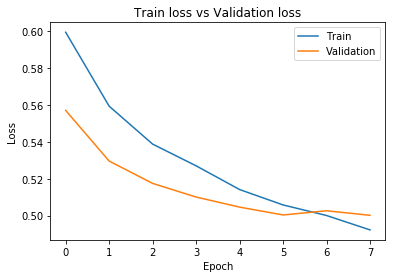

In [22]:
EPOCHS=8
BATCH_SIZE=128
def feed_forward_model():
    model = Sequential()
    model.add(Dense(60, activation="relu", kernel_initializer="uniform", input_dim=900))
    model.add(Dropout(0.55))
    #model.add(Dense(60, activation="relu", kernel_initializer="uniform"))
    #model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    return model
model=feed_forward_model()
optimizer=Adadelta(clipnorm=1.5)
optimizer = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#model.fit(trainData, trainLabels, epochs=25, batch_size=128, verbose=1)

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(X_test, Y_test))
plot_loss(history.history['loss'],history.history['val_loss'])

In [23]:
scores = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

test_acc=model.evaluate(X_test, Y_test)[1]
train_acc=model.evaluate(X_train, Y_train)[1]
val_acc=model.evaluate(X_val, Y_val)[1]

name="FFNeuralNetwork"
results.append((fpr, tpr,name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

6841/6841 [==============================] - 1s 165us/step


## Approach 2: RNN Models

In [24]:
# Split to train validation

X_train, Y_train = df.loc[X_train.index][questions_cols],df.loc[X_train.index][pred_column]
X_val, Y_val =  df.loc[X_val.index][questions_cols],df.loc[X_val.index][pred_column]
X_test, Y_test = df.loc[X_test.index][questions_cols],df.loc[X_test.index][pred_column]

### Splitting and zero padding.
Any sentence with length greater than SENTENCE_LEN will be truncated.<br>Any sentence with length lesser than SENTENCE_LEN will be padded with zeros.<br>

In [25]:
SENTENCE_LEN = 15

q1=questions_cols[0]
q2=questions_cols[1]

# Split to dicts
X_train      = {'left': X_train[q1],      'right': X_train[q2]}
X_val        = {'left': X_val[q1],        'right': X_val[q2]}
X_test       = {'left': X_test[q1],       'right': X_test[q2]}

# Convert labels to their numpy representations
Y_train      = Y_train.values
Y_val        = Y_val.values
Y_test       = Y_test.values

## Zero padding:
for dataset in [X_train, X_val, X_test]:
    for side in ['left', 'right']:
        dataset[side] = pad_sequences(dataset[side],  maxlen=SENTENCE_LEN)   

Dimensions of X_train['left'] after the above step.

In [26]:
X_train['left'].shape

(107167, 15)

### LSTM Classifier

This model is inspired by the blog post:<br>
https://medium.com/mlreview/implementing-malstm-on-kaggles-quora-question-pairs-competition-8b31b0b16a07 

In [27]:
## https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
## 
def LSTM_Model():
    # The visible layer33.
    left_input = Input(shape=(SENTENCE_LEN,), dtype='int32')
    right_input = Input(shape=(SENTENCE_LEN,), dtype='int32')

    embedding_layer = Embedding(len(embeddings), EMBEDDING_LEN, weights=[embeddings], input_length=SENTENCE_LEN, trainable=False)

    # Embedded version of the inputs
    encoded_left = embedding_layer(left_input)
    encoded_right = embedding_layer(right_input)

    # Since this is a siamese network, both sides share the same LSTM
    shared_lstm = LSTM(NODES)

    left_output = shared_lstm(encoded_left)
    right_output = shared_lstm(encoded_right)
    
    # Calculates the distance as defined by the MaLSTM model, exponent_neg_manhattan_distance
    distance = Lambda(function=lambda x: K.exp(-K.sum(K.abs(x[0]-x[1]), axis=1, keepdims=True)),output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

    # Pack it all up into a model
    model = Model([left_input, right_input], [distance])
    return model

In [28]:
# Model variables
GRADIENT_CLIP_NORM = 1.0
DROPOUT = 0.5
NODES = 30
BATCH_SIZE = 128
EPOCHS = 25

model = LSTM_Model()
# model = load_model(model_fname, weights_fname)

optimizer=Adadelta(clipnorm=GRADIENT_CLIP_NORM)
#optimizer=optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 

history = model.fit([X_train['left'], X_train['right']], Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                            validation_data=([X_val['left'], X_val['right']], Y_val),shuffle=True)


Train on 107167 samples, validate on 6841 samples
Epoch 1/25
107167/107167 [==============================] - 68s 637us/step - loss: 0.1895 - acc: 0.7187 - val_loss: 0.1829 - val_acc: 0.7372
Epoch 2/25
107167/107167 [==============================] - 74s 692us/step - loss: 0.1754 - acc: 0.7490 - val_loss: 0.1776 - val_acc: 0.7439
Epoch 3/25
107167/107167 [==============================] - 74s 695us/step - loss: 0.1690 - acc: 0.7615 - val_loss: 0.1739 - val_acc: 0.7493
Epoch 4/25
107167/107167 [==============================] - 75s 702us/step - loss: 0.1648 - acc: 0.7701 - val_loss: 0.1718 - val_acc: 0.7562
Epoch 5/25
107167/107167 [==============================] - 77s 715us/step - loss: 0.1616 - acc: 0.7761 - val_loss: 0.1694 - val_acc: 0.7591
Epoch 6/25
107167/107167 [==============================] - 80s 745us/step - loss: 0.1589 - acc: 0.7811 - val_loss: 0.1680 - val_acc: 0.7573
Epoch 7/25
107167/107167 [==============================] - 78s 725us/step - loss: 0.1567 - acc: 0.7860 

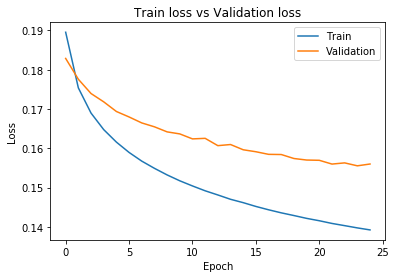

In [29]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [30]:
scores = model.predict([X_test['left'],X_test['right']]).ravel()
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

test_acc=model.evaluate([X_test['left'],X_test['right']], Y_test)[1]
train_acc=model.evaluate([X_train['left'],X_train['right']], Y_train)[1]
val_acc=model.evaluate([X_val['left'],X_val['right']], Y_val)[1]

name="LSTM"
results.append((fpr, tpr,name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

6841/6841 [==============================] - 2s 343us/step


### Attention Model

In [31]:
## https://github.com/bradleypallen/keras-quora-question-pairs/blob/master/quora-question-pairs-training-attention.ipynb
def Attention_Model():
    question1 = Input(shape=(SENTENCE_LEN,))
    question2 = Input(shape=(SENTENCE_LEN,))

    q1 = Embedding(len(embeddings), 
                     EMBEDDING_LEN, 
                     weights=[embeddings], 
                     input_length=SENTENCE_LEN, 
                     trainable=False)(question1)
    q1 = Bidirectional(LSTM(2, return_sequences=True), merge_mode="sum")(q1)

    q2 = Embedding(len(embeddings), 
                     EMBEDDING_LEN, 
                     weights=[embeddings], 
                     input_length=SENTENCE_LEN, 
                     trainable=False)(question2)
    q2 = Bidirectional(LSTM(2, return_sequences=True), merge_mode="sum")(q2)

    attention = dot([q1,q2], [1,1])
    attention = Flatten()(attention)
    
    attention = Dense((1*2))(attention)
    attention = Reshape((1,2))(attention)
    #attention = Dense((SENTENCE_LEN*EMBEDDING_LEN))(attention)
    #attention = Reshape((SENTENCE_LEN, EMBEDDING_LEN))(attention)

    merged = add([q1,attention])
    merged = Flatten()(merged)
    #merged = Dense(NODES, activation='relu')(merged)
    #merged = Dropout(DROPOUT)(merged)
    #merged = BatchNormalization()(merged)
    merged = Dense(NODES, activation='relu')(merged)
    merged = Dropout(DROPOUT)(merged)
    merged = BatchNormalization()(merged)

    is_duplicate = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[question1,question2], outputs=is_duplicate)
    return model

Train on 107167 samples, validate on 6841 samples
Epoch 1/15
107167/107167 [==============================] - 100s 936us/step - loss: 0.6565 - acc: 0.6176 - val_loss: 0.6247 - val_acc: 0.6312
Epoch 2/15
107167/107167 [==============================] - 96s 895us/step - loss: 0.6183 - acc: 0.6313 - val_loss: 0.5922 - val_acc: 0.6312
Epoch 3/15
107167/107167 [==============================] - 96s 895us/step - loss: 0.6000 - acc: 0.6368 - val_loss: 0.5857 - val_acc: 0.6312
Epoch 4/15
107167/107167 [==============================] - 97s 902us/step - loss: 0.5848 - acc: 0.6696 - val_loss: 0.5707 - val_acc: 0.7117
Epoch 5/15
107167/107167 [==============================] - 97s 908us/step - loss: 0.5721 - acc: 0.6922 - val_loss: 0.5672 - val_acc: 0.7148
Epoch 6/15
107167/107167 [==============================] - 98s 918us/step - loss: 0.5653 - acc: 0.7011 - val_loss: 0.5685 - val_acc: 0.7046
Epoch 7/15
107167/107167 [==============================] - 99s 925us/step - loss: 0.5593 - acc: 0.7057

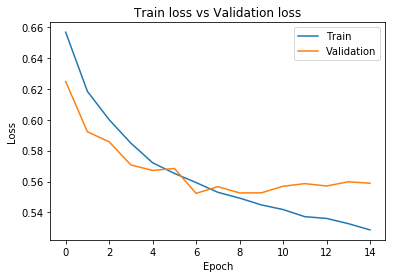

In [32]:
BATCH_SIZE = 128
EPOCHS = 15
NODES=3
DROPOUT=0.4

model=Attention_Model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_acc', save_best_only=True)]
history = model.fit([X_train['left'], X_train['right']], Y_train, epochs=EPOCHS,
                    validation_data=([X_val['left'], X_val['right']], Y_val),batch_size=BATCH_SIZE,)

#model.summary()
plot_loss(history.history['loss'],history.history['val_loss'])

In [33]:
scores = model.predict([X_test['left'],X_test['right']]).ravel()
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

test_acc=model.evaluate([X_test['left'],X_test['right']], Y_test)[1]
train_acc=model.evaluate([X_train['left'],X_train['right']], Y_train)[1]
val_acc=model.evaluate([X_val['left'],X_val['right']], Y_val)[1]

name="Attention"
results.append((fpr, tpr, name))
metrics.loc[name] = np.array([test_acc,train_acc,val_acc])

6841/6841 [==============================] - 5s 698us/step


## Results

AUC for Logistic is 0.7054427971558834
AUC for GNaiveBayes is 0.5676467539789799
AUC for RandomForest is 0.7539891580867158
AUC for FFNeuralNetwork is 0.829254180110518
AUC for LSTM is 0.8498453321801845
AUC for Attention is 0.771347743801122


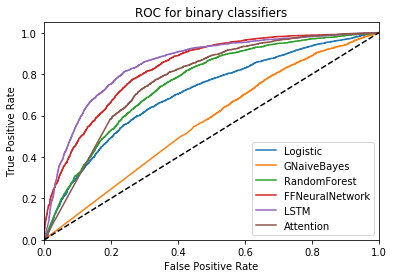

,test_accuracy,train_accuracy,val_accuracy
Logistic,0.683842,0.689503,0.682795
GNaiveBayes,0.482825,0.484030,0.483555
RandomForest,0.631217,0.631136,0.631194
FFNeuralNetwork,0.747183,0.772925,0.747844
LSTM,0.788266,0.823285,0.783073
Attention,0.716955,0.761167,0.719924


In [34]:
display_final_results(results)
metrics

## References:<br>
https://www.learnenglish.de/spelling/commonspellingmistakes.html

In [35]:
#Data exploration
##Hyperparameter tuning
#Conclusion
#Documentation
#Attention model
##Tfidf models